In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from numba import jit, njit, prange
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
from scipy.optimize import minimize

In [11]:
data_bN = pd.read_csv('rw_bulk_N.csv', index_col=0)
data_bNu = pd.read_csv('rw_bulk_Nunique.csv', index_col=0)
data_pN = pd.read_csv('rw_p_N.csv', index_col=0)
data_pNu = pd.read_csv('rw_p_Nunique.csv', index_col=0)

In [12]:
data_bN

,k,a,b,d_k,d_a,d_b,N_min,N_max
n1,0.342510,0.416707,0.014445,0.000816,0.001585,0.000144,3000.0,10000.0
n2,0.572697,0.170857,0.037394,0.004116,0.001095,0.002126,3000.0,10000.0
n3,0.587875,0.218865,0.201834,0.003017,0.003484,0.003088,3000.0,10000.0
n4,-1.239466,0.189293,0.758816,0.009563,0.003260,0.004921,500.0,10000.0
n_unique,0.831172,0.204894,0.161567,0.001112,0.000195,0.000432,500.0,10000.0


In [13]:
data_bNu

,k,a,b,d_k,d_a,d_b,N_min,N_max
n1,0.312899,0.479118,0.014961,0.001383,0.002225,0.000170,967.0,2875.0
n2,0.567402,0.213836,0.052791,0.003168,0.001114,0.001556,967.0,2875.0
n3,0.542193,0.244072,0.202502,0.005275,0.002297,0.002336,967.0,2875.0
n4,-1.200370,0.225437,0.741332,0.011843,0.004707,0.005629,197.0,2875.0


In [14]:
data_pN

,k,a,b,d_k,d_a,d_b,N_min,N_max
$p^{(0)}$,-1.172883,0.203473,0.616048,0.011220,0.007094,0.014073,3000.0,10000.0
$p^{(1)}$,0.539195,0.373621,0.212958,0.010730,0.032787,0.006282,3000.0,10000.0
$p^{(2)}$,0.595897,0.271845,0.137237,0.004384,0.006197,0.003529,1000.0,10000.0
$p^{(3)}$,0.613462,0.259167,0.091916,0.005285,0.005380,0.003748,750.0,10000.0


In [15]:
data_pNu

,k,a,b,d_k,d_a,d_b,N_min,N_max
$p^{(0)}$,-1.142980,0.251038,0.590519,0.009912,0.013999,0.019192,1533.0,2875.0
$p^{(1)}$,0.523587,0.437299,0.214146,0.014221,0.037107,0.005916,967.0,2875.0
$p^{(2)}$,0.584989,0.323486,0.141508,0.004864,0.007088,0.003251,363.0,2875.0
$p^{(3)}$,0.604267,0.310215,0.097261,0.005438,0.006058,0.003414,281.0,2875.0


In [7]:
def f_N(N, c):
    return c[0] * (1/N) ** c[1] + c[2]

def f_Nu_approx(N, cn, cU):
    k_i, a_i, b_i = cn
    k_u, a_u, b_u = cU
    return k_i / (b_u ** a_i) * (1/N) ** a_i - k_i * a_i * k_u / (b_u ** (a_i + 1)) * (1/N) ** (a_u + a_i) + b_i

def f_Nu(N, cn, cU):
    return cn[0] * (1/(N * f_N(N, cU))) ** cn[1] + cn[2]

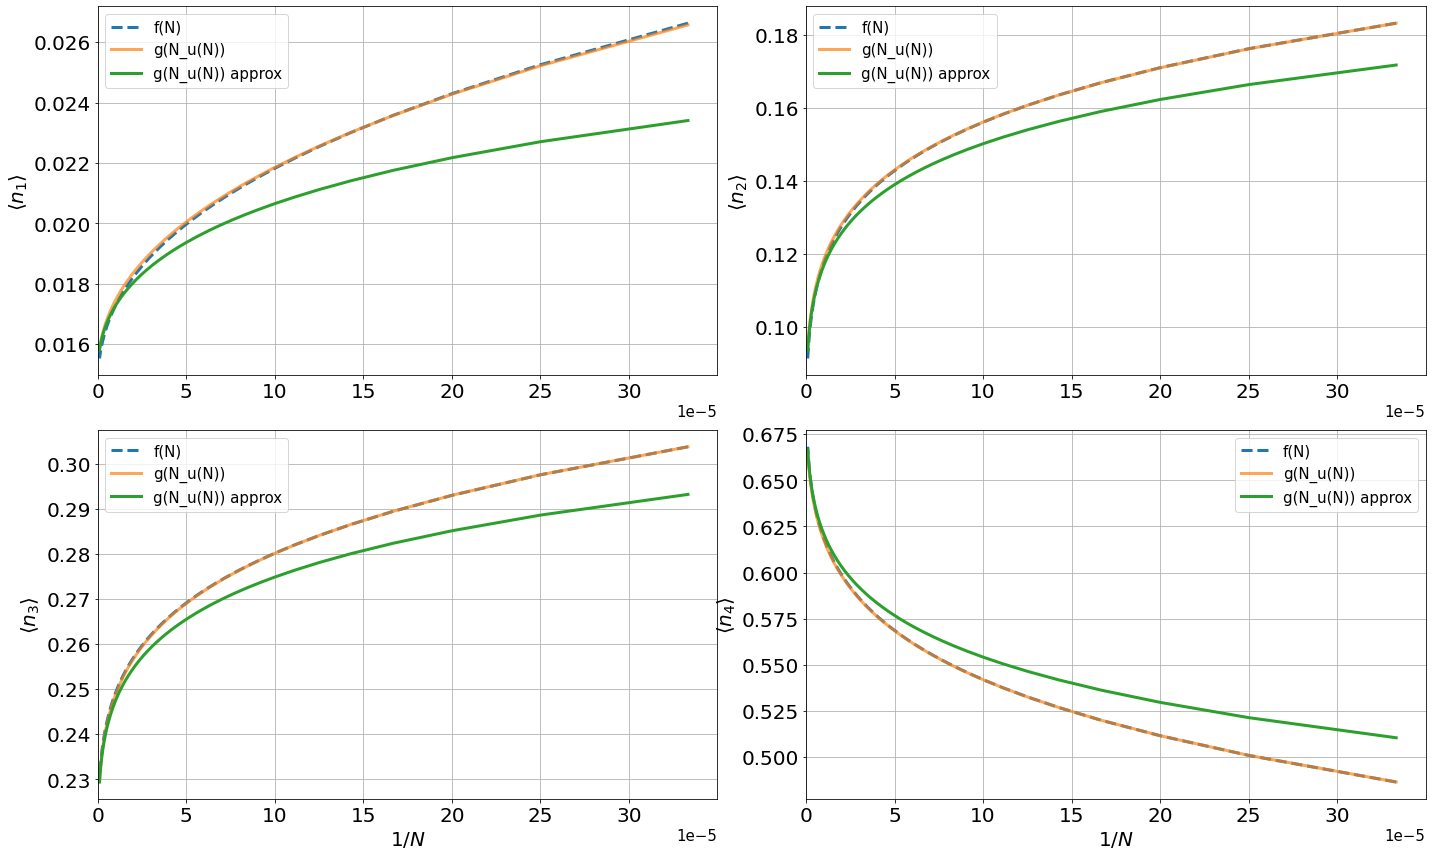

In [42]:
N = np.linspace(3000, 1e6, 1000)
x = 1/N
y_names = ['n1', 'n2', 'n3', 'n4']
log = False
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.flatten()
for i in range(4):
    ax0 = ax[i]
    c = data_bN.loc[y_names[i], ['k', 'a', 'b']].values
    y = f_N(N, c)
    ax0.plot(x, y, '--', label='f(N)', linewidth=3)
    
    cn = data_bNu.loc[y_names[i], ['k', 'a', 'b']].values
    cu = data_bN.loc['n_unique', ['k', 'a', 'b']].values
    y = f_Nu(N, cn, cu)
    ax0.plot(x, y, '-', label='g(N_u(N))', linewidth=3, alpha=0.7)
    
    
    y = f_Nu_approx(N, cn, cu)
    ax0.plot(x, y, '-', label='g(N_u(N)) approx', linewidth=3)
    
    
    ax0.set_ylabel(rf'$\langle n_{i+1} \rangle$', fontsize=20)
    if i >= 2:
        ax0.set_xlabel(r'$1/N$', fontsize=20);
    ax0.grid()
    ax0.legend(fontsize=15)
    ax0.ticklabel_format(axis='x', style='sci', scilimits=(-5,-5))
    ax0.xaxis.offsetText.set_fontsize(15)
    ax0.tick_params(which='both',labelsize=20)
    if log:
        ax0.set_xscale('log')
        ax0.set_yscale('log')
    else:
        ax0.set_xlim(0.)
    #plt.show()
plt.tight_layout()
plt.savefig(Photos_dir / 'n_i_fN_vs_gNun.png')

In [9]:
data_bN.loc['n1', ['k','a','b']].values

array([0.34250977, 0.41670675, 0.01444549])

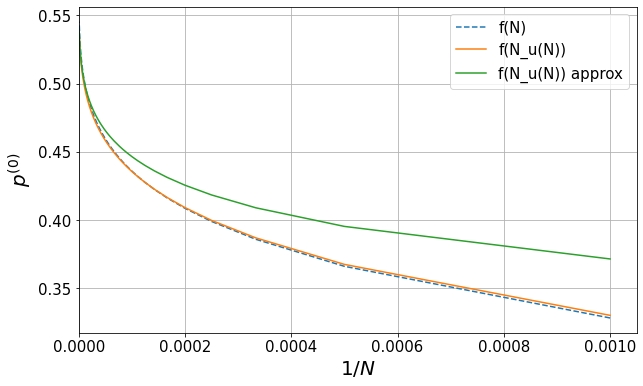

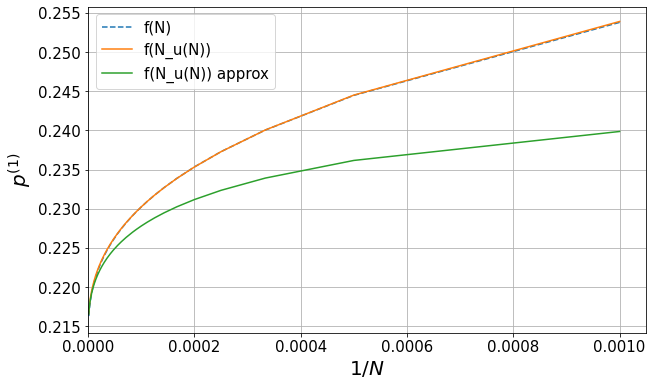

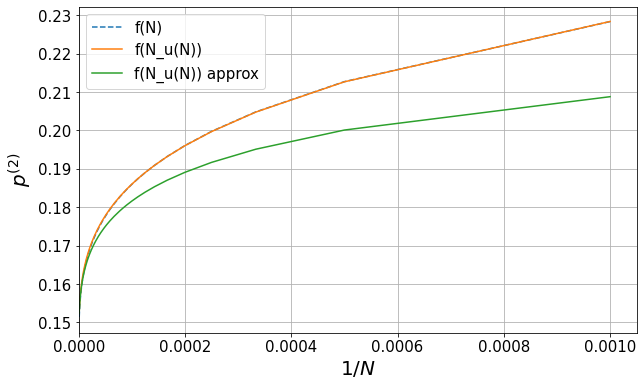

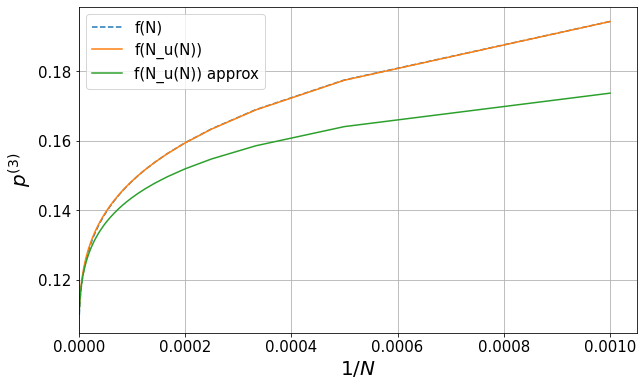

In [10]:
N = np.linspace(1000, 1e6, 1000)
x = 1/N
y_names = data_pN.index
log=False
for i in range(4):
    plt.figure(figsize=(10,6))
    c = data_pN.loc[y_names[i], ['k', 'a', 'b']].values
    y = f_N(N, c)
    plt.plot(x, y, '--', label='f(N)')
    
    cn = data_pNu.loc[y_names[i], ['k', 'a', 'b']].values
    cu = data_bN.loc['n_unique', ['k', 'a', 'b']].values
    y = f_Nu(N, cn, cu)
    plt.plot(x, y, '-', label='f(N_u(N))')
    
    
    y = f_Nu_approx(N, cn, cu)
    plt.plot(x, y, '-', label='f(N_u(N)) approx')
    
    plt.ylabel(y_names[i], fontsize=20)
    plt.xlabel(r'$1/N$', fontsize=20);
    plt.grid()
    if log:
        plt.xscale('log')
        plt.yscale('log')
    else:
        plt.xlim(0.)
    
    plt.legend(fontsize=15)
    plt.tick_params(labelsize=15)
    plt.show()